In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
model = models.load_model('cats_and_dogs_small_2.h5')
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
__________________________

In [4]:
def plt_show_img(img, figsize=None, dpi=100, cmap='viridis'):
    plt.clf()
    plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(img, cmap=cmap)
    plt.show()

<Figure size 432x288 with 0 Axes>

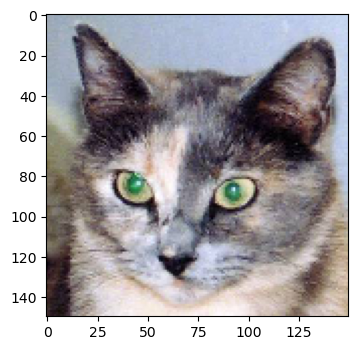

In [5]:
image_path = 'kaggle-dogs-vs-cats/cats_and_dogs_small/test/cats/cat.1700.jpg'
img = image.load_img(image_path, target_size=(150, 150))
plt_show_img(img)

In [6]:
image_tensor = image.img_to_array(img)
image_tensor = np.expand_dims(image_tensor, axis=0)
image_tensor /= 255.
image_tensor.shape

(1, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

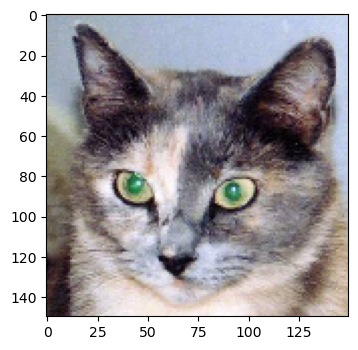

In [7]:
plt_show_img(image_tensor[0])

In [8]:
layer_output = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_output)

In [9]:
activations = activation_model.predict(image_tensor)

In [10]:
type(activations[0])

numpy.ndarray

In [11]:
activations[0].shape

(1, 148, 148, 32)

(1, 148, 148, 32)

<Figure size 432x288 with 0 Axes>

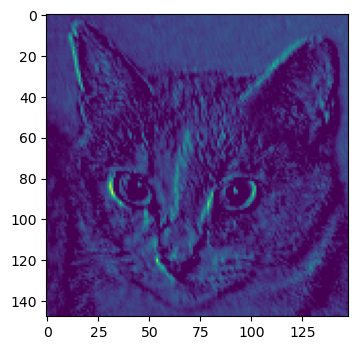

In [12]:
layer = activations[0]
layer.shape
img_32 = layer[0]
plt_show_img(img_32[:, :, 4])

In [19]:
%matplotlib inline
def plot_layer(layer_name, layer):
#     print(layer.shape)
    image_per_row = 16
    feature_num = layer.shape[-1]
    image_size = layer.shape[0]
    col_num = feature_num // image_per_row
    display_grid = np.zeros((image_size * col_num, image_size * image_per_row))
    for col in range(col_num):
        for row in range(image_per_row):
            channel_image = layer[:,:,row+col*image_per_row]
            # 特征处理成0~255之间的值
            channel_image -= channel_image.mean() # 均值
            channel_image /= channel_image.std() # 方差
            channel_image *= 64
            channel_image += 128
            # numpy.clip(a, a_min, a_max, out=None)
            # 其中a是一个数组，后面两个参数分别表示最小和最大值，将数组中的元素限制在a_min, a_max之间，
            # 大于a_max的就使得它等于 a_max，小于a_min,的就使得它等于a_min。
            channel_image = np.clip(channel_image, 0, 255).astype('uint8') # 限定在0 到255范围内
            display_grid[col*image_size: (col+1)*image_size, row*image_size:(row+1)*image_size] = channel_image

    scale = 1. / image_size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]), dpi=100)
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, cmap='viridis')

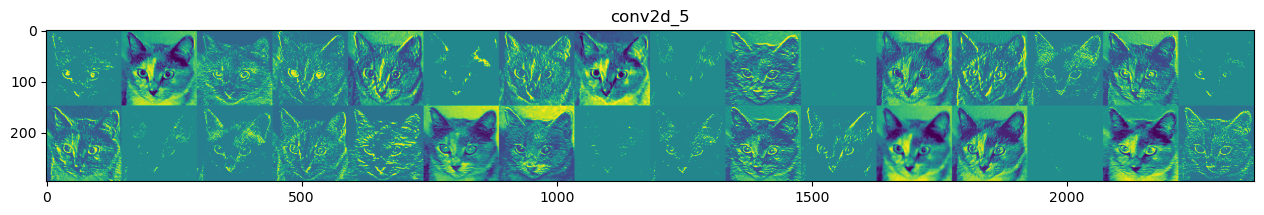

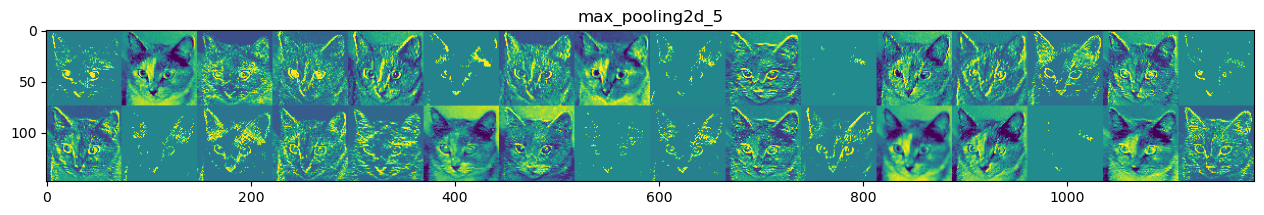

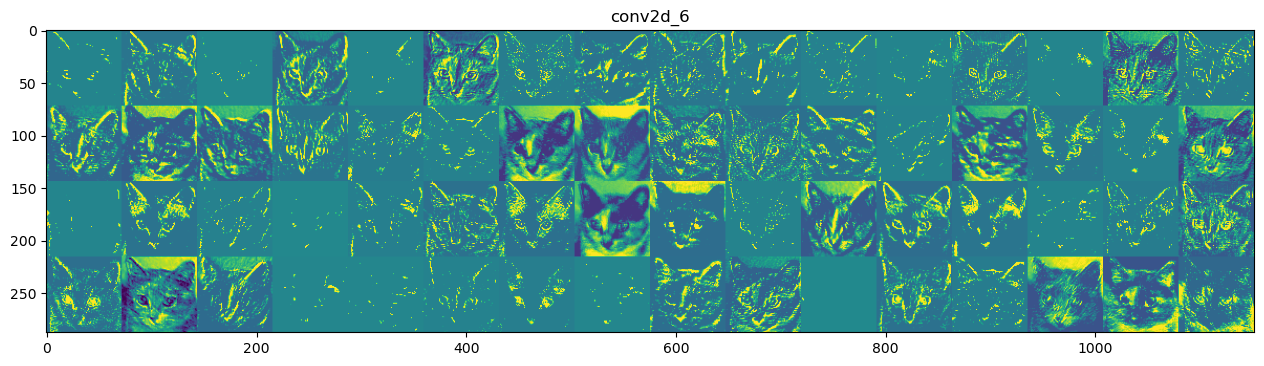

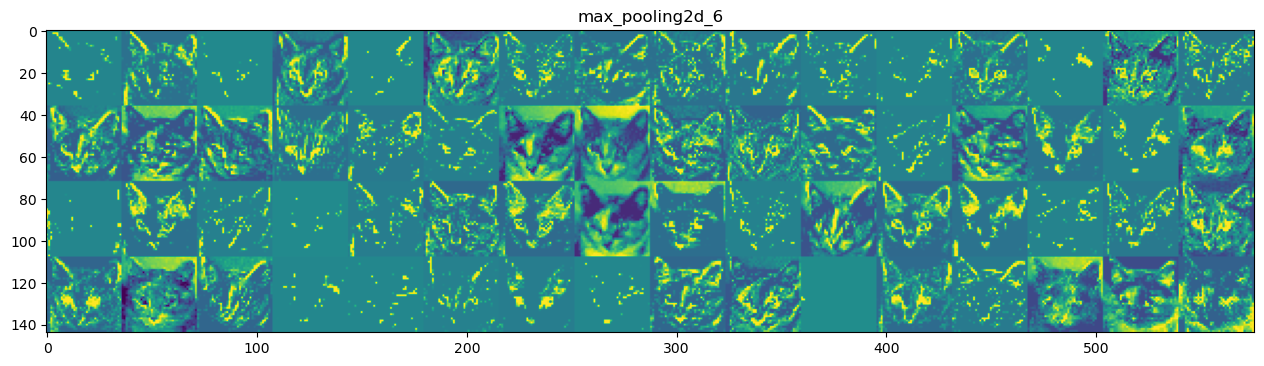

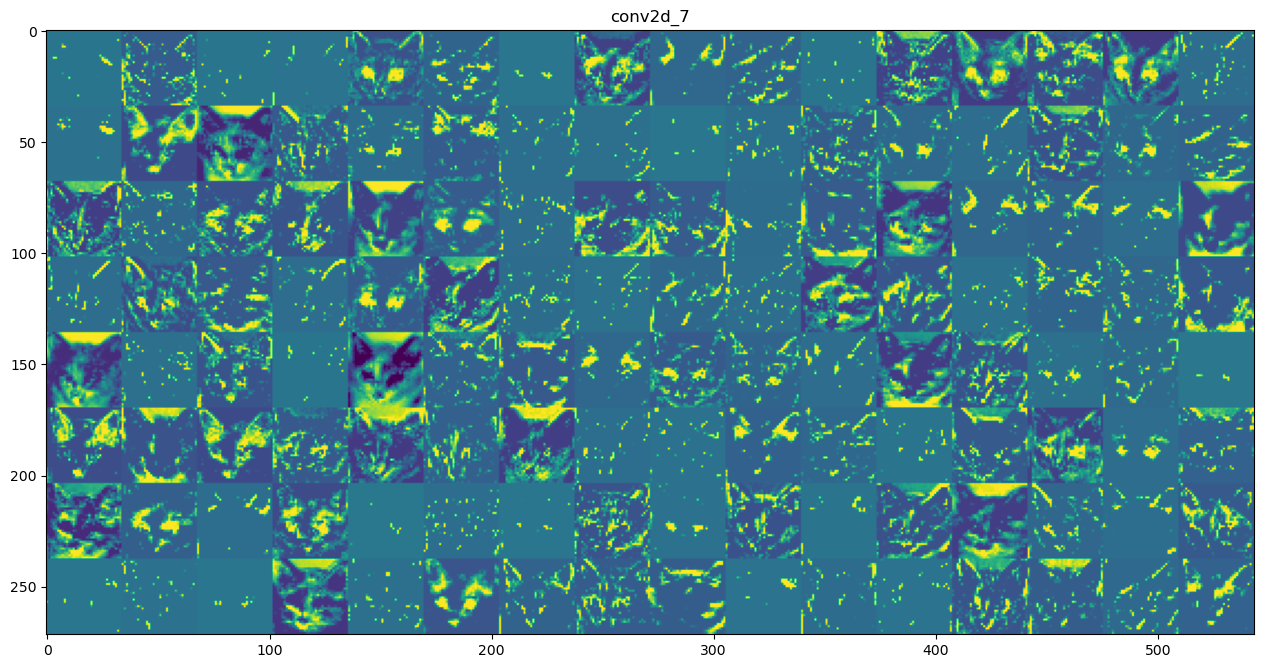

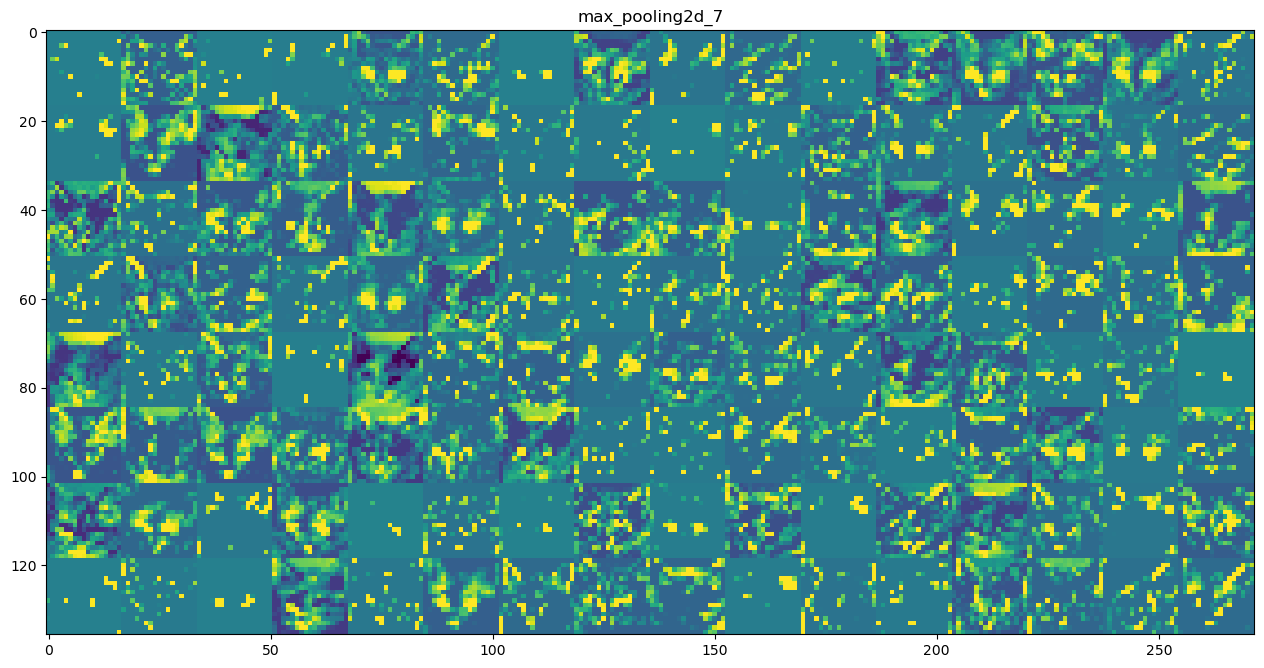

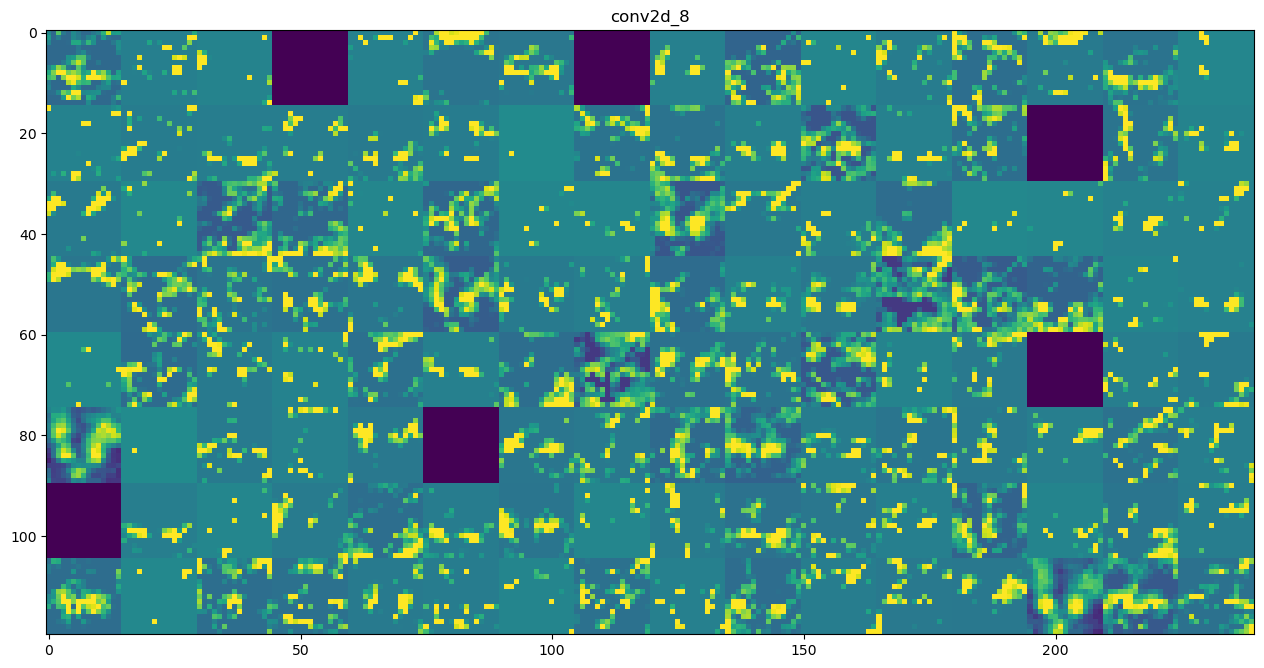

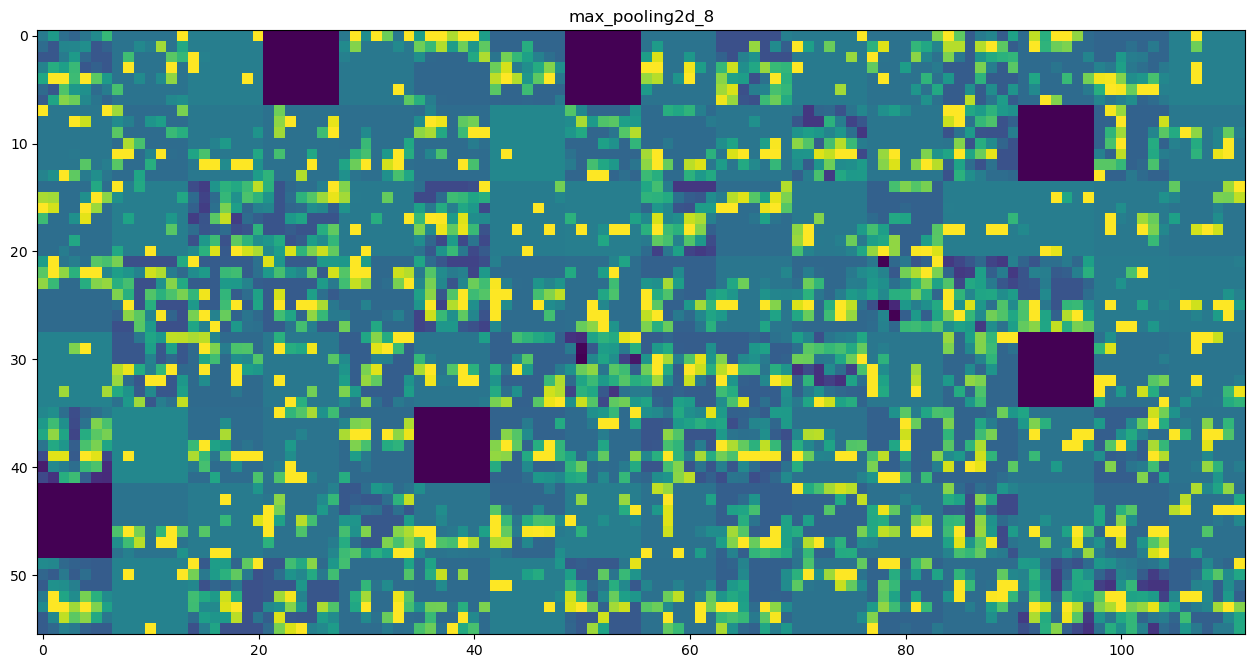

In [20]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
for layer_name, activation in zip(layer_names, activations):
#     activation.shape
    plot_layer(layer_name, activation[0])